# Solar-system-influence
A project about the influence of the solar system on man and Earth

# Abstract

Astrology suggests that planets and other celestial bodies may influence humans. We will examine how celestial bodies interact with humans and the Earth and compare them with objects approximating Earth. We will measure:

- Gravitational Interaction (F) in Newtons according to the Law of Universal Gravitation.

Since astrology lacks a specific description of how and by what means celestial bodies in the solar system influence an individual, let's focus on gravity influence. Given that astrology is a broad term, we won't delve into the details of the location of a planet within a particular constellation or which zodiac constellation is in the sky, as stars are too distant to exert any influence not only on an individual but on the entire solar system. The main question pertains to the impact on an individual as a singular object.

Although gravitational influence is meant to measure the force with which celestial bodies attract each other, it is a physical effect that can affect humans. Similarly, electromagnetic radiation, especially ultraviolet radiation, can have a physical impact on humans. Our goal is to demonstrate that the gravitational and electromagnetic effects of other planets on humans are very small and insignificant, making any influence unlikely.

As celestial bodies are highly massive and interact gravitationally with each other, which could potentially influence people on Earth, this is not a direct planetary impact on a specific individual but rather the Earth's influence on the entire human population, which is not related to astrology. As a point of fact, we will consider the average human mass (80kg) and calculate the gravitational influence of celestial bodies on an individual weighing 80kg.

# Method

## Gravity

To calculate gravity, it was assumed that the influence is calculated for a human located on Earth, without taking into account the influence of planets on the Earth itself. The standard weight of a human is 80 kg. Of course, planets exert gravitational influence on the Earth, while the Earth, in turn, influences the human. However, the essence of this work is to show that massive objects in the solar system have absolutely no impact on an individual, such as a human. 
The force was calculated:
```F = G(m1m2)/R^2```

In [1]:
import formulas
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
calc = formulas.Formula()
data_gravity = pd.read_excel('./data_gravity.xlsx')
data_gravity['F'] = data_gravity.apply(lambda row: calc.gravitylaw(row['m1 (kg)'], row['m2 (kg)'], row['R (m)']), axis=1)
earth_F = data_gravity.loc[data_gravity['Nr']==11]['F']


data_gravity['X'] = data_gravity.apply(lambda row: round(earth_F/row['F'], 0), axis=1)
man_data = data_gravity.loc[data_gravity['Object1']=="Man"]
man_data = man_data.sort_values(by='F', ascending=False)

earth_data = data_gravity.loc[data_gravity['Object1']=="Earth"]



In [3]:
man_data

,Nr,Object1,Object2,Mo,m1 (kg),m2 (kg),G,h (m),r (m),R (m),F,X
8,11.0,Man,Earth,NaN,80.0,6.000000e+24,6.674300e-11,NaN,6400000.0,6400000,7.821445e+02,1.000000e+00
15,13.0,Man,Sun,330000.0000,80.0,1.988400e+30,6.674300e-11,NaN,NaN,150000000000,4.718641e-01,1.658000e+03
14,12.0,Man,Moon,0.0123,80.0,7.347700e+22,6.674300e-11,NaN,NaN,384400000,2.655097e-03,2.945820e+05
17,15.0,Man,Jupiter,317.8300,80.0,1.000000e+27,6.674300e-11,NaN,NaN,630000000000,1.345286e-05,5.813965e+07
10,NaN,Man,Venus,NaN,80.0,4.867000e+24,6.674300e-11,NaN,NaN,61000000000,6.983890e-06,1.119927e+08
11,NaN,Man,Saturn,NaN,80.0,5.683400e+26,6.674300e-11,NaN,NaN,1200000000000,2.107373e-06,3.711467e+08
9,NaN,Man,Mercury,NaN,80.0,3.301100e+23,6.674300e-11,NaN,NaN,77000000000,2.972850e-07,2.630959e+09
16,14.0,Man,Mars,0.1070,80.0,1.000000e+23,6.674300e-11,NaN,NaN,56000000000,1.702628e-07,4.593750e+09
12,NaN,Man,Uran,NaN,80.0,8.681300e+25,6.674300e-11,NaN,NaN,2600000000000,6.856994e-08,1.140652e+10
13,NaN,Man,Neptun,NaN,80.0,1.024130e+26,6.674300e-11,NaN,NaN,4300000000000,2.957426e-08,2.644680e+10


# Visualization for Force (F) and Distance (r)
We know from the formula that gravitational force (F) decreases with distance. This means that the farther away an object is from the massive object, the weaker the gravitational interaction it experiences. Because the force is calculated based on mass and distance, in the visualization, we can observe that the force decreases not only with respect to distance but also with respect to mass. For example, Jupiter is much farther from Venus, but it exerts a greater influence because it is much more massive than Venus. However, these interactions are so small that they are practically close to zero.


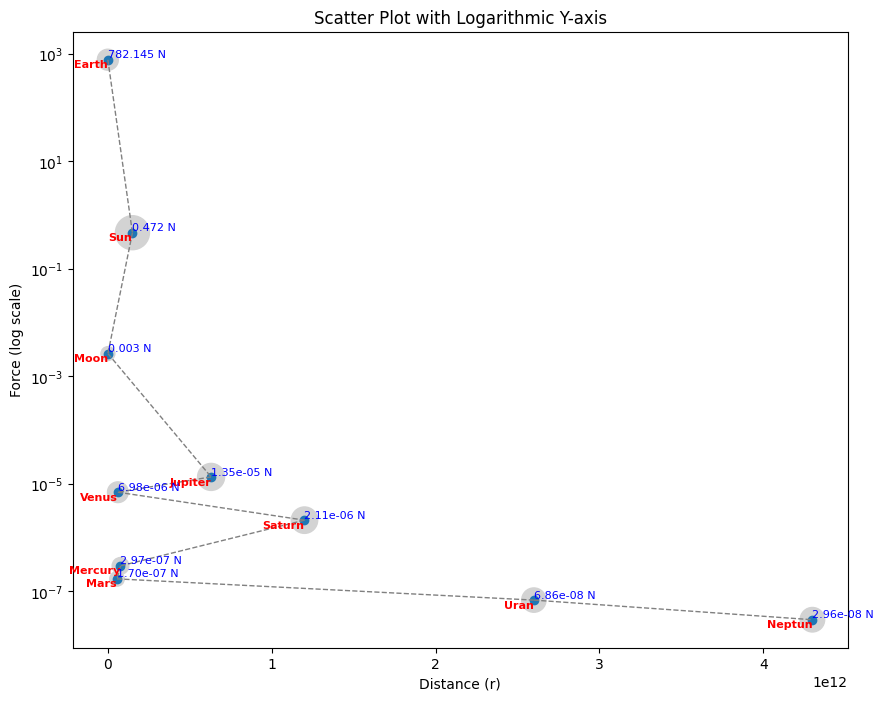

In [29]:
import matplotlib.pyplot as plt

mass = man_data['m2 (kg)'].tolist()
distance = man_data['R (m)'].tolist()
F = man_data['F'].tolist()
name = man_data['Object2'].tolist()
XX = man_data['X'].tolist()

mass_np = np.array(mass)

sizes = 500 * (np.log10(mass_np) - np.log10(min(mass_np))) / (np.log10(max(mass_np)) - np.log10(min(mass_np))) + 100
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(distance, F, c='lightgrey', marker='o', s = sizes)



for i, txt in enumerate(name):
    ax.text(distance[i], F[i], f'{txt}', fontsize=8, ha='right', va='top', color='red', weight='bold')
    
for i, txt in enumerate(F):
    if txt >= 0.001:
        formatted_number = str(round(txt, 3)) + " N"
    else:
        formatted_number = str("{:.2e}".format(txt)) + " N"
      
        
    ax.text(distance[i], F[i], f'{formatted_number}', fontsize=8, ha='left', va='bottom', color='blue')

for i in range(len(distance) - 1):
    ax.plot([distance[i], distance[i+1]], [F[i], F[i+1]], color='gray', linestyle='--', linewidth=1)
plt.scatter(man_data['R (m)'], man_data['F'])
ax.set_xlabel('Distance (r)')
ax.set_ylabel('Force (F)')
plt.yscale('log')  
plt.xlabel('Distance (r)')
plt.ylabel('Force (log scale)')  
plt.title('Scatter Plot with Logarithmic Y-axis')

plt.show()


# Visualization for how many times less it affects

Here, it will show how many times less planets interact with a human compared to the interaction of Earth. We can observe that gravitational force decreases and by how many times it decreases relative to the gravitational force of the Earth and a human. For example, the Sun exerts gravitational force 1658 times less on a human than the Earth does, while Neptune exerts gravitational force 24 billion times less than the Earth on a human.

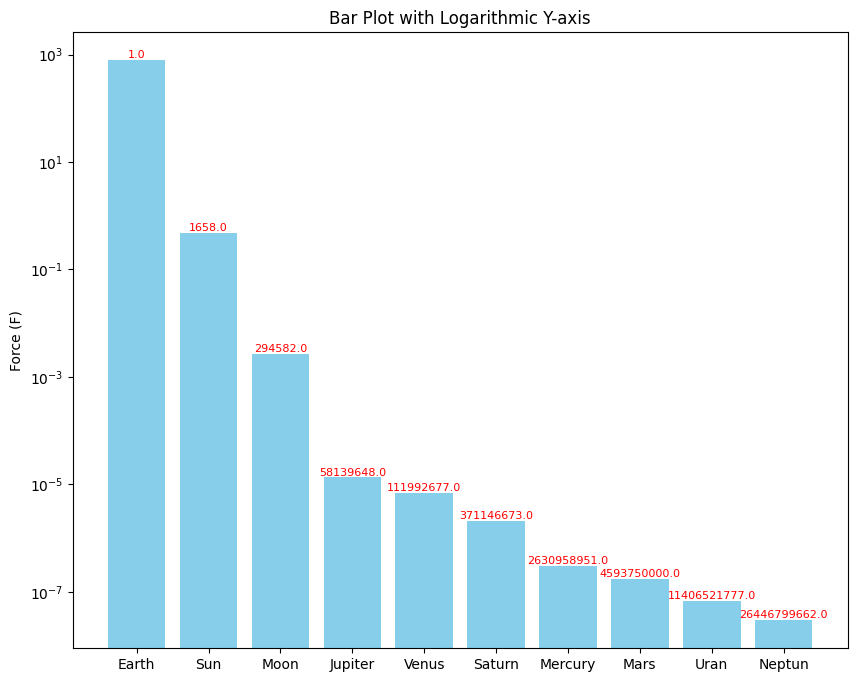

In [5]:
import matplotlib.pyplot as plt

F = man_data['F'].tolist()
XX = man_data['X'].tolist()
name = man_data['Object2'].tolist()

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.bar(name, F, color='skyblue', label = XX)
bars = ax.bar(name, F, color='skyblue', label='Force (F)')
ax.set_ylabel('Force (F)')
plt.yscale('log')  

for bar, value in zip(bars, XX):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
            ha='center', va='bottom', fontsize=8, color='red')
    
    
plt.title('Bar Plot with Logarithmic Y-axis')
plt.show()

# Source
1. https://zpe.gov.pl/a/prawo-powszechnego-ciazenia/DIdzGlunk - Newton's law of universal gravitation